In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "/content/drive/MyDrive/241121_Halitosis_data preprocessing.xlsx"

df = pd.read_excel(file_path)


# 평균값으로 채울 컬럼
mean_fill_columns = ['pH', 'BufferCapacity']

# 0으로 채울 컬럼
zero_fill_columns = ['S_Hypertension', 'S_DM', 'S_Hyperlipidemia', 'S_RenalDiseases', 'S_LiverDiseases',
                     'S_Rheumatism', 'S_Osteoporosis', 'S_CVD', 'S_TD', 'S_MentalDisorders', 'S_UrinaryDiseases','S_Asthma']

# 1. 평균값으로 결측치 채우기
for column in mean_fill_columns:
    df[column] = df[column].fillna(df[column].mean())

# 2. 0으로 결측치 채우기
df[zero_fill_columns] = df[zero_fill_columns].fillna(0)

# 3. 빈 값 (공백, NaN 등)을 0으로 채우기
df = df.replace(r'^\s*$', 0, regex=True)  # 공백 값을 0으로 변환
df = df.fillna(0)  # NaN 값을 0으로 변환

columns = df.columns
print(len(columns))
print(columns)
df.count()

#df.to_excel("/content/drive/MyDrive/241121_Halitosis_data preprocessing.xlsx", index=False)

49
Index(['Halitosis_subjective', 'Sex', 'Age', 'Elderly', 'Super_Elderly',
       'Xerostomia_subjective', 'UFR', 'SFR', 'pH', 'BufferCapacity', 'VAS',
       'StickySaliva', 'Oralhygiene', 'Calculus', 'O_Stomatitis', 'O_RAU',
       'O_Candidiasis', 'O_Periodontitis', 'O_LichenPlanus', 'O_Sialodochitis',
       'O_Glossodynia', 'O_BMS', 'S_Hypertension', 'S_DM', 'S_Hyperlipidemia',
       'S_RenalDiseases', 'S_LiverDiseases', 'S_Rheumatism', 'S_Osteoporosis',
       'S_CVD', 'S_TD', 'S_MentalDisorders', 'S_UrinaryDiseases', 'S_Asthma',
       'S_CancerOp', 'NumberofSystmicDiseases', 'M_Hypertension', 'M_DM',
       'M_Osteoporosis', 'M_Hyperlipidemia', 'M_CV', 'M_TD', 'M_GI',
       'M_UrinaryDiseases', 'M_Arthritis', 'M_Rheumatism', 'M_Anxiolytic',
       'M_SleepingPills', 'M_Aspirin'],
      dtype='object')


,0
Halitosis_subjective,821
Sex,821
Age,821
Elderly,821
Super_Elderly,821
Xerostomia_subjective,821
UFR,821
SFR,821
pH,821
BufferCapacity,821


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:51:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Results:
Accuracy: 0.8255
ROC-AUC: 0.9035
              precision    recall  f1-score   support

           0       0.86      0.80      0.83       143
           1       0.80      0.86      0.82       132

    accuracy                           0.83       275
   macro avg       0.83      0.83      0.83       275
weighted avg       0.83      0.83      0.83       275



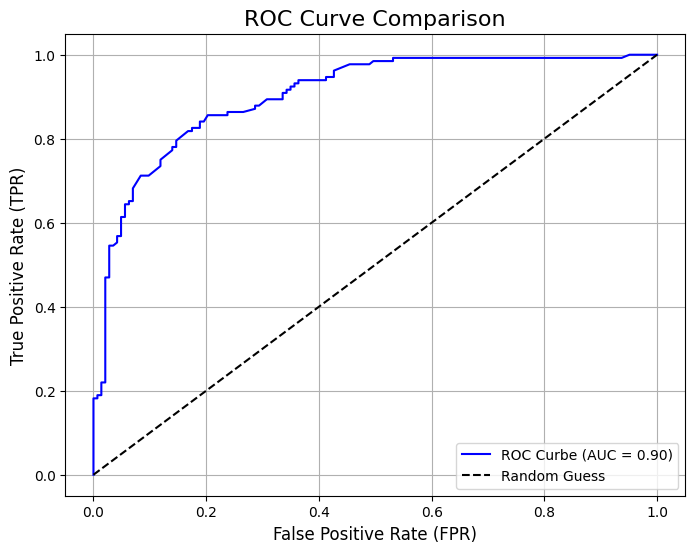

In [25]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# ROC 피겨 데이터 #1
# 1. 데이터 준비
X = df[['Xerostomia_subjective','UFR', 'SFR']]  # F, G, H열
y = df['Halitosis_subjective']  # A열

# 2. SMOTE 적용
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# 학습/검증 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# 3. XGBoost 모델
xgb_model_1 = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model_1.fit(X_train, y_train)
xgb_pred_1 = xgb_model_1.predict(X_test)
xgb_pred_prob_1 = xgb_model_1.predict_proba(X_test)[:, 1]

# 4. 성능 평가
# XGBoost
print("\nXGBoost Results:")
print(f"Accuracy: {accuracy_score(y_test, xgb_pred_1):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, xgb_pred_prob_1):.4f}")
print(classification_report(y_test, xgb_pred_1))

# XGBoost ROC Curve
xgb_fpr_1, xgb_tpr_1, _ = roc_curve(y_test, xgb_pred_prob_1)
xgb_auc_1 = auc(xgb_fpr_1, xgb_tpr_1)

# Plot ROC Curves
plt.figure(figsize=(8, 6))

plt.plot(xgb_fpr_1, xgb_tpr_1, label=f"ROC Curbe (AUC = {xgb_auc_1:.2f})", color="blue")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.title("ROC Curve Comparison", fontsize=16)
plt.xlabel("False Positive Rate (FPR)", fontsize=12)
plt.ylabel("True Positive Rate (TPR)", fontsize=12)
plt.legend(loc="lower right")
plt.grid()
plt.show()

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:51:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Results:
Accuracy: 0.8618
ROC-AUC: 0.9417
              precision    recall  f1-score   support

           0       0.91      0.82      0.86       143
           1       0.82      0.91      0.86       132

    accuracy                           0.86       275
   macro avg       0.86      0.86      0.86       275
weighted avg       0.87      0.86      0.86       275



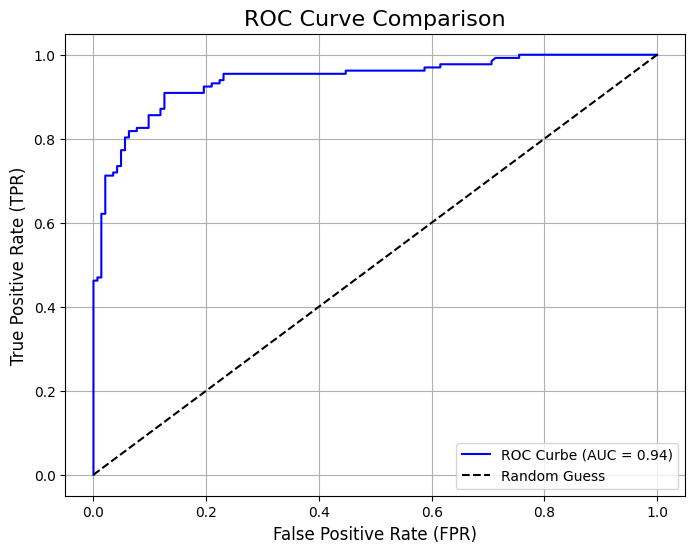

In [26]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import pandas as pd
import matplotlib.pyplot as plt

# ROC 피겨 데이터 #2
# 1. 데이터 준비
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])  # 성별 인코딩
X = df[['Sex', 'Age', 'Xerostomia_subjective', 'UFR', 'SFR']]  # B, C, F, G, H열
y = df['Halitosis_subjective']  # A열

# 2. SMOTE로 데이터 증강
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# 3. 학습/검증 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# 3. XGBoost 모델
xgb_model_2 = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model_2.fit(X_train, y_train)
xgb_pred_2 = xgb_model_2.predict(X_test)
xgb_pred_prob_2 = xgb_model_2.predict_proba(X_test)[:, 1]

# 4. 성능 평가
# XGBoost
print("\nXGBoost Results:")
print(f"Accuracy: {accuracy_score(y_test, xgb_pred_2):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, xgb_pred_prob_2):.4f}")
print(classification_report(y_test, xgb_pred_2))

# XGBoost ROC Curve
xgb_fpr_2, xgb_tpr_2, _ = roc_curve(y_test, xgb_pred_prob_2)
xgb_auc_2 = auc(xgb_fpr_2, xgb_tpr_2)

# Plot ROC Curves
plt.figure(figsize=(8, 6))

plt.plot(xgb_fpr_2, xgb_tpr_2, label=f"ROC Curbe (AUC = {xgb_auc_2:.2f})", color="blue")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.title("ROC Curve Comparison", fontsize=16)
plt.xlabel("False Positive Rate (FPR)", fontsize=12)
plt.ylabel("True Positive Rate (TPR)", fontsize=12)
plt.legend(loc="lower right")
plt.grid()
plt.show()


XGBoost Results:
Accuracy: 0.9018
ROC-AUC: 0.9663
              precision    recall  f1-score   support

           0       0.95      0.86      0.90       143
           1       0.86      0.95      0.90       132

    accuracy                           0.90       275
   macro avg       0.90      0.90      0.90       275
weighted avg       0.91      0.90      0.90       275



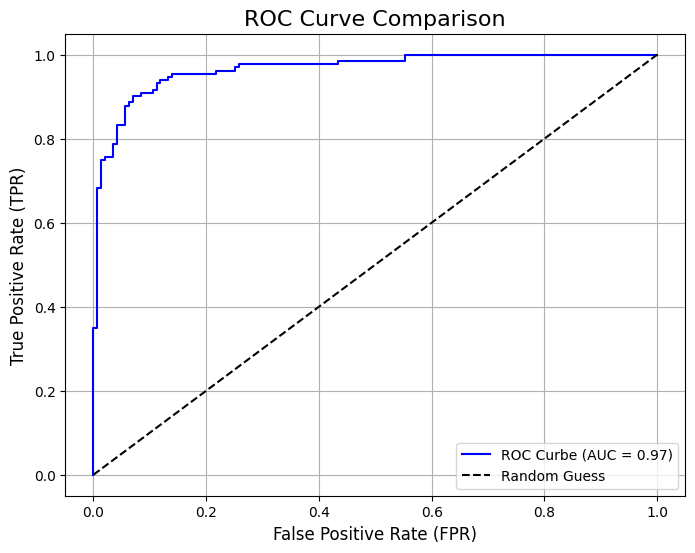

In [34]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import pandas as pd
import matplotlib.pyplot as plt

# ROC 피겨 데이터 #3
# 1. 데이터 준비
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])  # 성별 인코딩
X = df[['Sex', 'Age', 'Xerostomia_subjective', 'UFR', 'SFR', 'pH', 'BufferCapacity', 'VAS', 'StickySaliva', 'Oralhygiene', 'Calculus']]  # B, C, F, G, H, I-N열 추가
y = df['Halitosis_subjective']  # A열

# 2. SMOTE로 데이터 증강
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# 3. 학습/검증 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


# 4. XGBoost 모델 학습 (Hyperparameter Tuning 포함)
xgb_model_3 = XGBClassifier(
    eval_metric='logloss',
    random_state=42,
    max_depth=8,         # 트리의 최대 깊이
    learning_rate=0.2,   # 학습률
    n_estimators=150,    # 부스팅 단계 수
    subsample=0.9        # 샘플링 비율
)
xgb_model_3.fit(X_train, y_train)

# 3. XGBoost 모델
xgb_pred_3 = xgb_model_3.predict(X_test)
xgb_pred_prob_3 = xgb_model_3.predict_proba(X_test)[:, 1]

# 4. 성능 평가
# XGBoost
print("\nXGBoost Results:")
print(f"Accuracy: {accuracy_score(y_test, xgb_pred_3):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, xgb_pred_prob_3):.4f}")
print(classification_report(y_test, xgb_pred_3))

# XGBoost ROC Curve
xgb_fpr_3, xgb_tpr_3, _ = roc_curve(y_test, xgb_pred_prob_3)
xgb_auc_3 = auc(xgb_fpr_3, xgb_tpr_3)

# Plot ROC Curves
plt.figure(figsize=(8, 6))

plt.plot(xgb_fpr_3, xgb_tpr_3, label=f"ROC Curbe (AUC = {xgb_auc_3:.2f})", color="blue")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.title("ROC Curve Comparison", fontsize=16)
plt.xlabel("False Positive Rate (FPR)", fontsize=12)
plt.ylabel("True Positive Rate (TPR)", fontsize=12)
plt.legend(loc="lower right")
plt.grid()
plt.show()

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:52:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Results:
Accuracy: 0.8691
ROC-AUC: 0.9434
              precision    recall  f1-score   support

           0       0.91      0.83      0.87       143
           1       0.83      0.91      0.87       132

    accuracy                           0.87       275
   macro avg       0.87      0.87      0.87       275
weighted avg       0.87      0.87      0.87       275



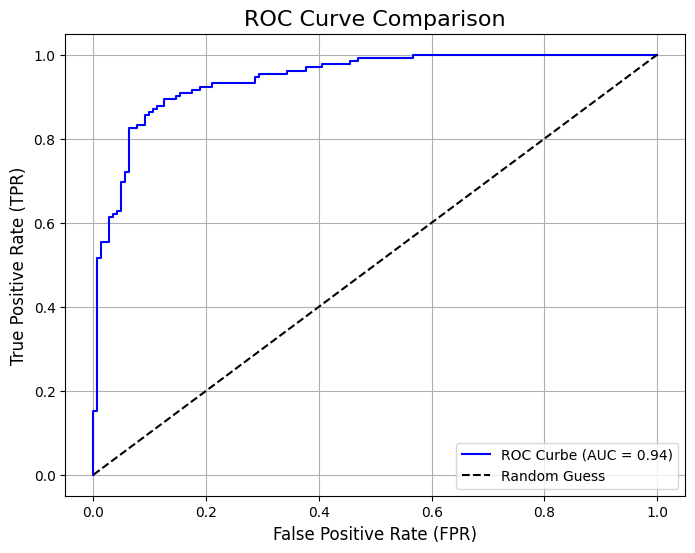

In [28]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import pandas as pd
import matplotlib.pyplot as plt

# ROC 피겨 데이터 #4
# 1. 데이터 준비
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])  # 성별 인코딩
# 기존 B, C, F, G, H + O-V열 추가
X = df[['Sex', 'Age', 'Xerostomia_subjective', 'UFR', 'SFR',
        'O_Stomatitis', 'O_RAU', 'O_Candidiasis', 'O_Periodontitis', 'O_LichenPlanus', 'O_Sialodochitis',
        'O_Glossodynia', 'O_BMS']]  # 열 리스트 수정
y = df['Halitosis_subjective']  # A열 (타겟 변수)

# 2. SMOTE로 데이터 증강
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# 3. 학습/검증 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# 3. XGBoost 모델
xgb_model_4 = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model_4.fit(X_train, y_train)
xgb_pred_4 = xgb_model_4.predict(X_test)
xgb_pred_prob_4 = xgb_model_4.predict_proba(X_test)[:, 1]

# 4. 성능 평가
# XGBoost
print("\nXGBoost Results:")
print(f"Accuracy: {accuracy_score(y_test, xgb_pred_4):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, xgb_pred_prob_4):.4f}")
print(classification_report(y_test, xgb_pred_4))

# XGBoost ROC Curve
xgb_fpr_4, xgb_tpr_4, _ = roc_curve(y_test, xgb_pred_prob_4)
xgb_auc_4 = auc(xgb_fpr_4, xgb_tpr_4)

# Plot ROC Curves
plt.figure(figsize=(8, 6))

plt.plot(xgb_fpr_4, xgb_tpr_4, label=f"ROC Curbe (AUC = {xgb_auc_4:.2f})", color="blue")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.title("ROC Curve Comparison", fontsize=16)
plt.xlabel("False Positive Rate (FPR)", fontsize=12)
plt.ylabel("True Positive Rate (TPR)", fontsize=12)
plt.legend(loc="lower right")
plt.grid()
plt.show()

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:53:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Results:
Accuracy: 0.8727
ROC-AUC: 0.9344
              precision    recall  f1-score   support

           0       0.91      0.84      0.87       143
           1       0.84      0.91      0.87       132

    accuracy                           0.87       275
   macro avg       0.87      0.87      0.87       275
weighted avg       0.88      0.87      0.87       275



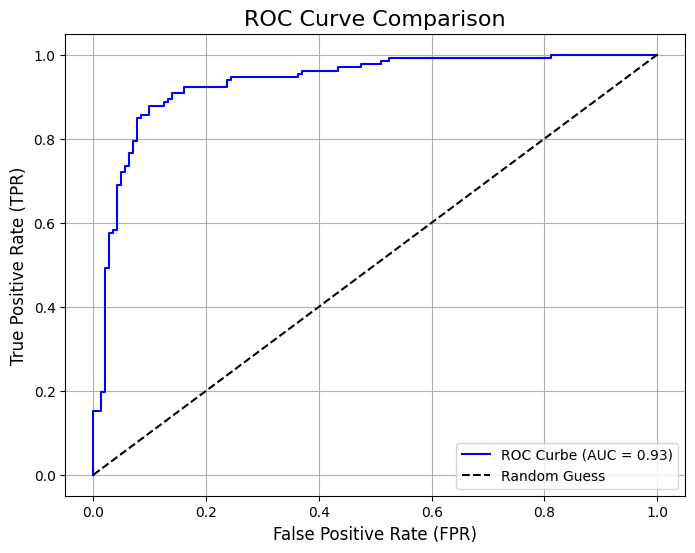

In [29]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import pandas as pd
import matplotlib.pyplot as plt

# ROC 피겨 데이터 #5
# 1. 데이터 준비
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])  # 성별 인코딩
# 기존 변수(B, C, F, G, H + W-AJ열 추가
X = df[['Sex', 'Age', 'Xerostomia_subjective', 'UFR', 'SFR',
        'S_Hypertension', 'S_DM', 'S_Hyperlipidemia',
        'S_RenalDiseases', 'S_LiverDiseases', 'S_Rheumatism', 'S_Osteoporosis',
        'S_CVD', 'S_TD', 'S_MentalDisorders', 'S_UrinaryDiseases', 'S_Asthma',
        'S_CancerOp', 'NumberofSystmicDiseases']]  # W~AJ 열 추가
y = df['Halitosis_subjective']  # A열 (타겟 변수)

# 2. SMOTE로 데이터 증강
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# 3. 학습/검증 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# 3. XGBoost 모델
xgb_model_5 = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model_5.fit(X_train, y_train)
xgb_pred_5 = xgb_model_5.predict(X_test)
xgb_pred_prob_5 = xgb_model_5.predict_proba(X_test)[:, 1]

# 4. 성능 평가
# XGBoost
print("\nXGBoost Results:")
print(f"Accuracy: {accuracy_score(y_test, xgb_pred_5):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, xgb_pred_prob_5):.4f}")
print(classification_report(y_test, xgb_pred_5))

# XGBoost ROC Curve
xgb_fpr_5, xgb_tpr_5, _ = roc_curve(y_test, xgb_pred_prob_5)
xgb_auc_5 = auc(xgb_fpr_5, xgb_tpr_5)

# Plot ROC Curves
plt.figure(figsize=(8, 6))

plt.plot(xgb_fpr_5, xgb_tpr_5, label=f"ROC Curbe (AUC = {xgb_auc_5:.2f})", color="blue")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.title("ROC Curve Comparison", fontsize=16)
plt.xlabel("False Positive Rate (FPR)", fontsize=12)
plt.ylabel("True Positive Rate (TPR)", fontsize=12)
plt.legend(loc="lower right")
plt.grid()
plt.show()

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:53:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Results:
Accuracy: 0.8618
ROC-AUC: 0.9374
              precision    recall  f1-score   support

           0       0.92      0.80      0.86       143
           1       0.81      0.92      0.87       132

    accuracy                           0.86       275
   macro avg       0.87      0.86      0.86       275
weighted avg       0.87      0.86      0.86       275



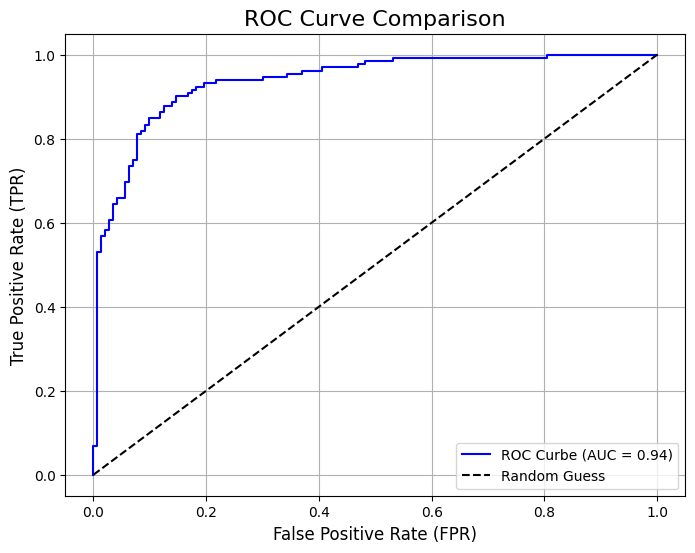

In [30]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import pandas as pd
import matplotlib.pyplot as plt

# ROC 피겨 데이터 #6
# 1. 데이터 준비
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])  # 성별 인코딩
# 기존 변수(B, C, F, G, H + AK-AW 열 추가)
X = df[['Sex', 'Age', 'Xerostomia_subjective', 'UFR', 'SFR',
        'M_Hypertension', 'M_DM',
        'M_Osteoporosis', 'M_Hyperlipidemia', 'M_CV', 'M_TD', 'M_GI',
        'M_UrinaryDiseases', 'M_Arthritis', 'M_Rheumatism', 'M_Anxiolytic',
        'M_SleepingPills', 'M_Aspirin']]  # AK-AW 열 추가
y = df['Halitosis_subjective']  # A열 (타겟 변수)

# 2. SMOTE로 데이터 증강
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# 3. 학습/검증 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# 3. XGBoost 모델
xgb_model_6 = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model_6.fit(X_train, y_train)
xgb_pred_6 = xgb_model_6.predict(X_test)
xgb_pred_prob_6 = xgb_model_6.predict_proba(X_test)[:, 1]

# 4. 성능 평가
# XGBoost
print("\nXGBoost Results:")
print(f"Accuracy: {accuracy_score(y_test, xgb_pred_6):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, xgb_pred_prob_6):.4f}")
print(classification_report(y_test, xgb_pred_6))

# XGBoost ROC Curve
xgb_fpr_6, xgb_tpr_6, _ = roc_curve(y_test, xgb_pred_prob_6)
xgb_auc_6 = auc(xgb_fpr_6, xgb_tpr_6)

# Plot ROC Curves
plt.figure(figsize=(8, 6))

plt.plot(xgb_fpr_6, xgb_tpr_6, label=f"ROC Curbe (AUC = {xgb_auc_6:.2f})", color="blue")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.title("ROC Curve Comparison", fontsize=16)
plt.xlabel("False Positive Rate (FPR)", fontsize=12)
plt.ylabel("True Positive Rate (TPR)", fontsize=12)
plt.legend(loc="lower right")
plt.grid()
plt.show()



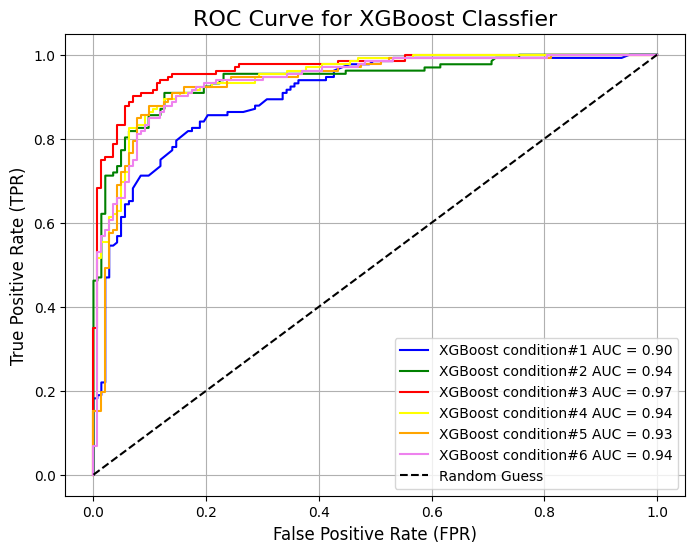

In [35]:
# 기존 그래프에 추가
plt.figure(figsize=(8, 6))
plt.plot(xgb_fpr_1, xgb_tpr_1, label=f"XGBoost condition#1 AUC = {xgb_auc_1:.2f}", color="blue")
plt.plot(xgb_fpr_2, xgb_tpr_2, label=f"XGBoost condition#2 AUC = {xgb_auc_2:.2f}", color="green")
plt.plot(xgb_fpr_3, xgb_tpr_3, label=f"XGBoost condition#3 AUC = {xgb_auc_3:.2f}", color="red")
plt.plot(xgb_fpr_4, xgb_tpr_4, label=f"XGBoost condition#4 AUC = {xgb_auc_4:.2f}", color="yellow")
plt.plot(xgb_fpr_5, xgb_tpr_5, label=f"XGBoost condition#5 AUC = {xgb_auc_5:.2f}", color="orange")
plt.plot(xgb_fpr_6, xgb_tpr_6, label=f"XGBoost condition#6 AUC = {xgb_auc_6:.2f}", color="violet")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")

# 그래프 꾸미기
plt.title("ROC Curve for XGBoost Classfier", fontsize=16)
plt.xlabel("False Positive Rate (FPR)", fontsize=12)
plt.ylabel("True Positive Rate (TPR)", fontsize=12)
plt.legend(loc="lower right")
plt.grid()
plt.show()